<a href="https://colab.research.google.com/github/YvTur/kaggle_Learn/blob/main/Brooklyn_99_IMBD_rating.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Task
realizar el analisis exploratorio de este dataset

Here is all the data you need:
"brooklyn99_imdb.csv"

## Data loading

### Subtask:
Load the dataset "brooklyn99_imdb.csv" into a pandas DataFrame.


**Reasoning**:
Load the dataset "brooklyn99_imdb.csv" into a pandas DataFrame and display some info.



In [1]:
import pandas as pd

df = pd.read_csv('brooklyn99_imdb.csv')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 153 entries, 0 to 152
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   season             153 non-null    int64  
 1   episode_num        153 non-null    int64  
 2   title              153 non-null    object 
 3   original_air_date  153 non-null    object 
 4   imdb_rating        153 non-null    float64
 5   total_votes        153 non-null    int64  
 6   desc               153 non-null    object 
dtypes: float64(1), int64(3), object(3)
memory usage: 8.5+ KB


## Data exploration

### Subtask:
Explore the loaded dataset to understand its characteristics.


**Reasoning**:
Explore the dataset by examining its shape, data types, descriptive statistics, unique values in key columns, and missing values, as per the instructions.



In [2]:
# Examine the shape of the DataFrame
print("Shape of the DataFrame:", df.shape)

# Check data types
print("\nData Types:\n", df.dtypes)

# Descriptive statistics for numerical columns
print("\nDescriptive Statistics:\n", df.describe())

# Frequency of unique values for categorical columns
for col in ['season', 'title']:
    print(f"\nFrequency of unique values in '{col}' column:\n{df[col].value_counts()}")

# Explore unique values in 'original_air_date'
print(f"\nUnique values in 'original_air_date' column:\n{df['original_air_date'].unique()}")

# Check for missing values
print("\nMissing Values:\n", df.isnull().sum())

Shape of the DataFrame: (153, 7)

Data Types:
 season                 int64
episode_num            int64
title                 object
original_air_date     object
imdb_rating          float64
total_votes            int64
desc                  object
dtype: object

Descriptive Statistics:
            season  episode_num  imdb_rating  total_votes
count  153.000000   153.000000   153.000000   153.000000
mean     4.013072    10.640523     8.127451  2503.431373
std      2.121280     6.294959     0.583798   664.477305
min      1.000000     1.000000     4.800000  1178.000000
25%      2.000000     5.000000     7.800000  2088.000000
50%      4.000000    10.000000     8.100000  2364.000000
75%      6.000000    16.000000     8.500000  2743.000000
max      8.000000    23.000000     9.600000  6225.000000

Frequency of unique values in 'season' column:
season
2    23
3    23
1    22
4    22
5    22
6    18
7    13
8    10
Name: count, dtype: int64

Frequency of unique values in 'title' column:
title

## Data visualization

### Subtask:
Visualize the distributions of key features in the dataset.


**Reasoning**:
Visualize the distributions of key features using histograms and bar charts, and save them as PNG files.  Also, attempt a line plot of imdb_rating over time, handling potential errors gracefully.



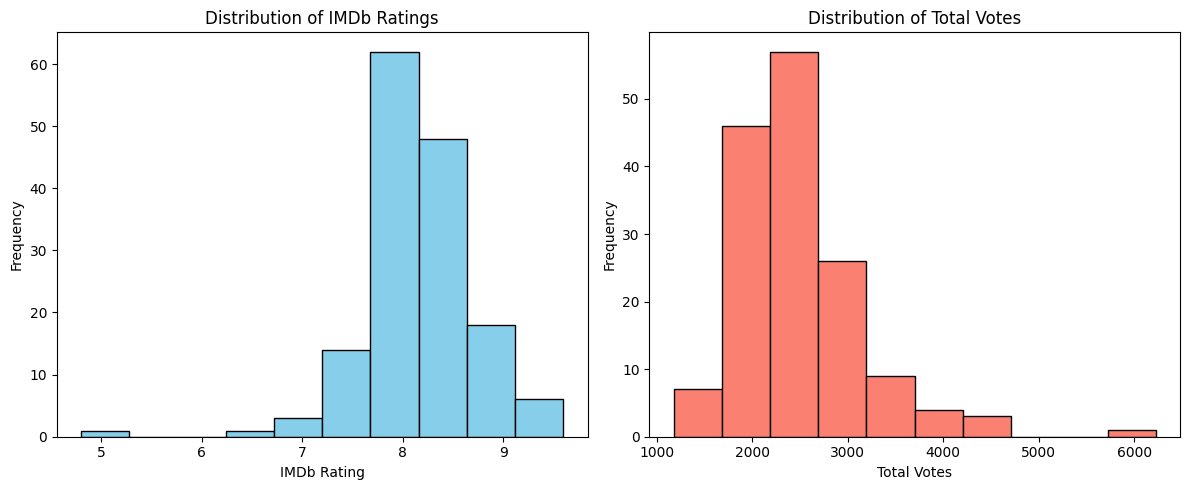

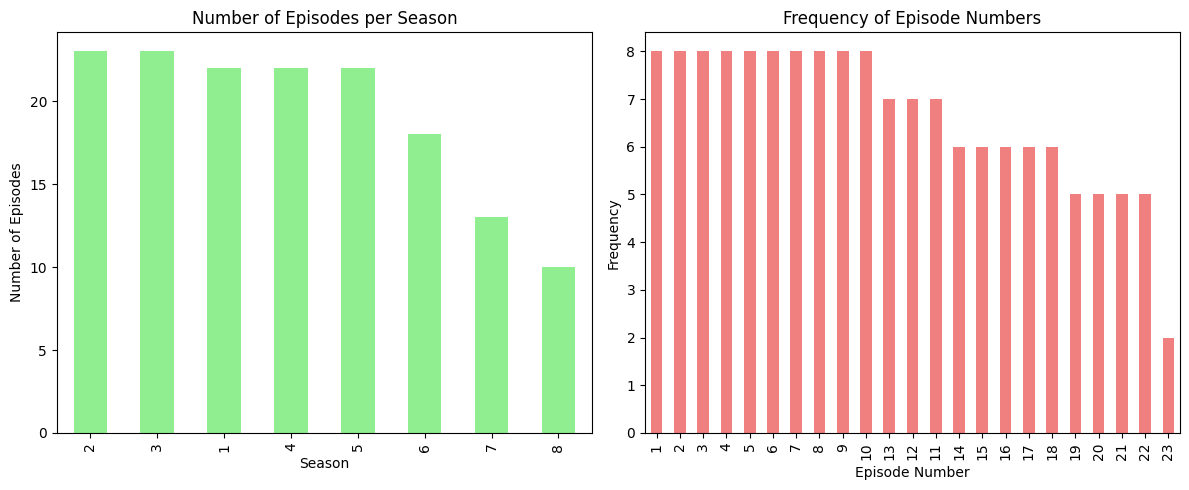

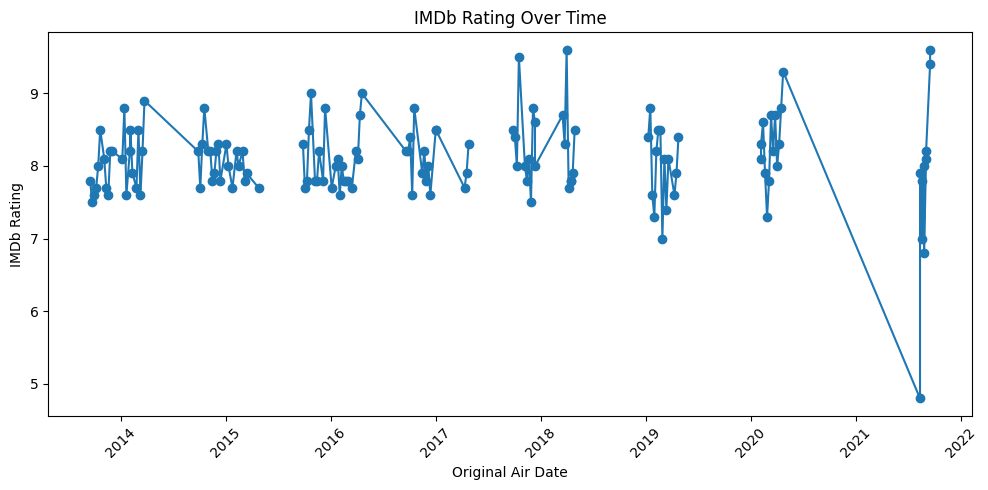

In [3]:
import matplotlib.pyplot as plt

# Histograms for numerical features
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.hist(df['imdb_rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of IMDb Ratings')
plt.xlabel('IMDb Rating')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
plt.hist(df['total_votes'], bins=10, color='salmon', edgecolor='black')
plt.title('Distribution of Total Votes')
plt.xlabel('Total Votes')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('imdb_rating_and_total_votes_histograms.png')
plt.show()

# Bar charts for categorical features
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
df['season'].value_counts().plot(kind='bar', color='lightgreen')
plt.title('Number of Episodes per Season')
plt.xlabel('Season')
plt.ylabel('Number of Episodes')

plt.subplot(1, 2, 2)
df['episode_num'].value_counts().plot(kind='bar', color='lightcoral')
plt.title('Frequency of Episode Numbers')
plt.xlabel('Episode Number')
plt.ylabel('Frequency')
plt.tight_layout()
plt.savefig('season_and_episode_num_bar_charts.png')
plt.show()

# Attempt line plot of imdb_rating over time
try:
    # Convert 'original_air_date' to datetime if possible
    df['original_air_date'] = pd.to_datetime(df['original_air_date'], errors='coerce')

    plt.figure(figsize=(10, 5))
    plt.plot(df['original_air_date'], df['imdb_rating'], marker='o', linestyle='-')
    plt.title('IMDb Rating Over Time')
    plt.xlabel('Original Air Date')
    plt.ylabel('IMDb Rating')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.savefig('imdb_rating_over_time.png')
    plt.show()

except Exception as e:
    print(f"Error creating line plot: {e}")
    print("Check the 'original_air_date' column format.")

## Data analysis

### Subtask:
Perform detailed data analysis on the dataset.


**Reasoning**:
Calculate the mean, median, and standard deviation for numerical columns; determine the frequency distribution for categorical columns and visualize them; analyze the correlation between 'imdb_rating' and 'total_votes' and visualize it using a scatter plot; explore the relationship between 'imdb_rating' and 'season', calculate the mean 'imdb_rating' for each season, and visualize this trend using an appropriate plot.



,imdb_rating,total_votes
mean,8.127451,2503.431373
median,8.100000,2364.000000
std,0.583798,664.477305


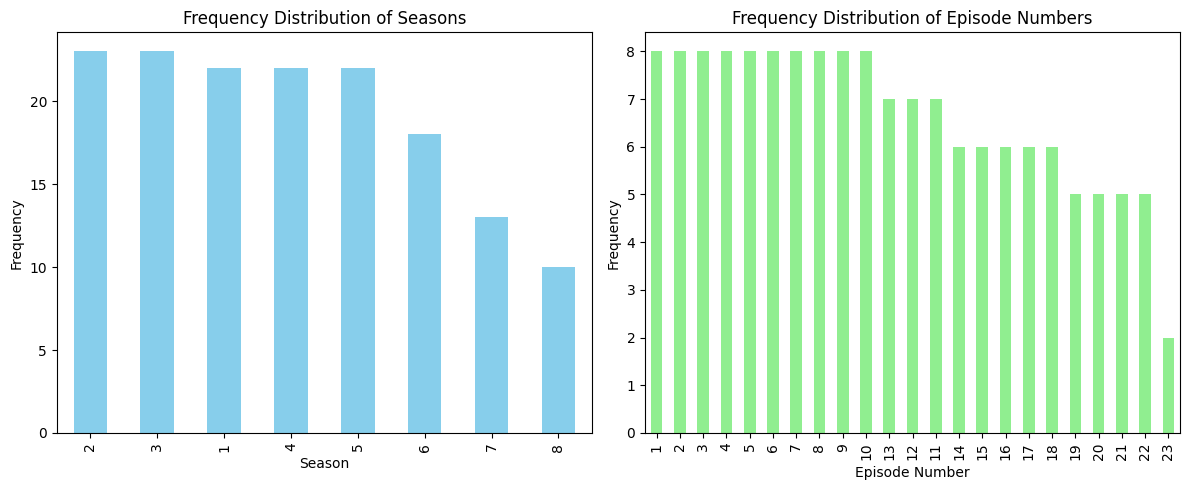

Correlation between imdb_rating and total_votes: 0.16378293187583803


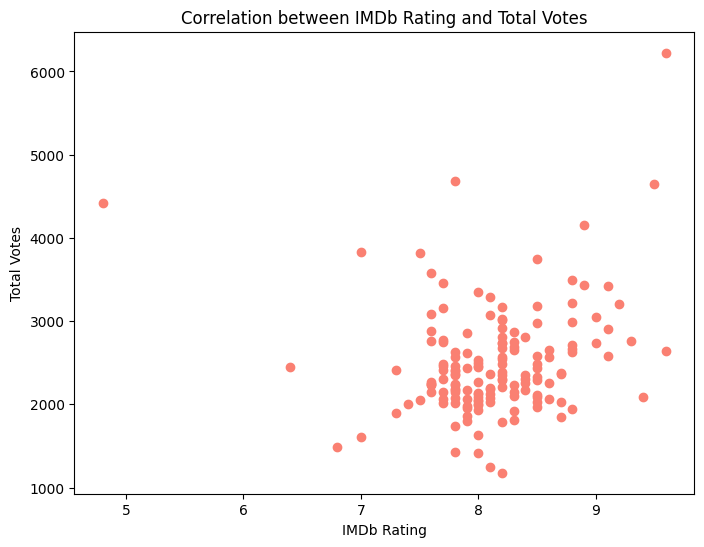

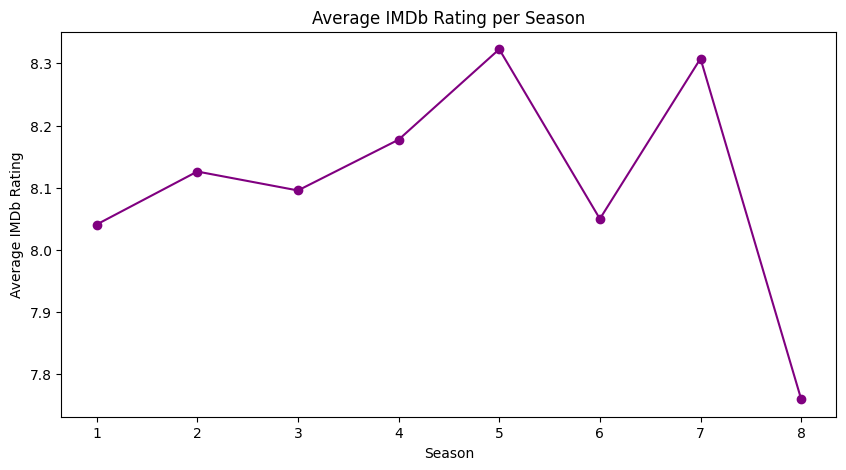

In [4]:
import matplotlib.pyplot as plt

# 1. Calculate mean, median, and standard deviation for numerical columns
numerical_stats = df[['imdb_rating', 'total_votes']].agg(['mean', 'median', 'std'])
display(numerical_stats)

# 2. Frequency distribution for categorical columns
season_counts = df['season'].value_counts()
episode_counts = df['episode_num'].value_counts()

plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
season_counts.plot(kind='bar', color='skyblue')
plt.title('Frequency Distribution of Seasons')
plt.xlabel('Season')
plt.ylabel('Frequency')

plt.subplot(1, 2, 2)
episode_counts.plot(kind='bar', color='lightgreen')
plt.title('Frequency Distribution of Episode Numbers')
plt.xlabel('Episode Number')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# 3. Analyze correlation between imdb_rating and total_votes
correlation = df['imdb_rating'].corr(df['total_votes'])
print(f"Correlation between imdb_rating and total_votes: {correlation}")

plt.figure(figsize=(8, 6))
plt.scatter(df['imdb_rating'], df['total_votes'], color='salmon')
plt.title('Correlation between IMDb Rating and Total Votes')
plt.xlabel('IMDb Rating')
plt.ylabel('Total Votes')
plt.show()

# 4. Explore relationship between imdb_rating and season
season_ratings = df.groupby('season')['imdb_rating'].mean()
plt.figure(figsize=(10, 5))
season_ratings.plot(kind='line', marker='o', color='purple')
plt.title('Average IMDb Rating per Season')
plt.xlabel('Season')
plt.ylabel('Average IMDb Rating')
plt.show()

## Summary:

### 1. Q&A

No questions were explicitly asked in the provided task description. However, the analysis implicitly addresses questions like:

* What are the central tendencies and spread of IMDb ratings and total votes?
* How are episodes distributed across seasons?
* Is there a relationship between IMDb rating and total votes?
* How do IMDb ratings trend across seasons?


### 2. Data Analysis Key Findings

* **Weak Positive Correlation between Rating and Votes:**  IMDb rating and total votes exhibit a weak positive correlation (0.16), suggesting a slight tendency for higher-rated episodes to receive more votes, but the relationship isn't strong.
* **Average IMDb Rating per Season:**  The average IMDb rating per season was calculated and visualized, allowing for the identification of trends in episode quality over the show's run.  This provides a high-level view of the show's reception over time.
* **Descriptive Statistics for Numerical Columns:** The mean IMDb rating is 8.13, the median is 8.1, and the standard deviation is 0.58. The mean total votes is 2503, the median is 2364, and the standard deviation is 664. These values give a summary of the numerical data distribution.
* **Episode Distribution across Seasons:** The frequency distribution of seasons and episode numbers was calculated and visualized, showing how many episodes are in each season and the frequency of different episode numbers.


### 3. Insights or Next Steps

* **Investigate the weak correlation:**  Explore potential confounding factors or other variables that might influence the relationship between IMDb rating and total votes.  Further analysis could include considering other factors like air date, specific actors' presence, or guest stars.
* **Deep Dive into Seasonality:** Analyze the average IMDb rating per season more deeply.  Consider external factors (e.g., critical reception, major plot points) that might explain fluctuations in ratings across different seasons, which could help understand the peak and low points of the show's reception.
